In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.preprocessing import LabelEncoder

In [2]:
path="files/A_DeviceMotion_data/A_DeviceMotion_data"

# Reviewing vis_dataset

In [3]:
review_data=pd.read_csv("files/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_1.csv",index_col="Unnamed: 0")

This is a vis_dataset of single activity of a single user

In [7]:
review_data[["gravity.x","gravity.y","gravity.z"]]

,gravity.x,gravity.y,gravity.z
0,0.741895,0.669768,-0.031672
1,0.753099,0.657116,-0.032255
2,0.759611,0.649555,-0.032707
3,0.760709,0.647788,-0.041140
4,0.760062,0.647210,-0.058530
...,...,...,...
1746,0.824443,0.533154,0.189844
1747,0.817212,0.539396,0.203020
1748,0.809207,0.546658,0.215288
1749,0.800485,0.553834,0.229110


In [5]:
activities=os.listdir(path)
activities=np.array([act.split("_")[0] for act in activities])
activities

array(['dws', 'dws', 'dws', 'jog', 'jog', 'sit', 'sit', 'std', 'std',
       'ups', 'ups', 'ups', 'wlk', 'wlk', 'wlk'], dtype='<U3')

In [6]:
LE=LabelEncoder()
LE.fit(activities)

LabelEncoder()

In [7]:
LE.transform(["dws"])

array([0])

# vis_dataset Creation

In [8]:
vis_dataset=pd.DataFrame()
dataset=pd.DataFrame()
idx=0
for activity in os.listdir(path):
    for user in os.listdir(path+"/"+activity):
        act=LE.transform([activity.split("_")[0]])[0]
        user_id=int(user.split("_")[1].split(".")[0])
        temp_frame=pd.read_csv(os.path.join(path,activity,user),index_col="Unnamed: 0")
        temp_frame[f"activity"]=act
        dataset=pd.concat([dataset,temp_frame])
        temp_frame.rename(columns={"attitude.roll":f"attitude.roll+{idx}_{act}_{user_id}","attitude.pitch":f"attitude.pitch+{idx}_{act}_{user_id}","attitude.yaw":f"attitude.yaw+{idx}_{act}_{user_id}","gravity.x":f"gravity.x+{idx}_{act}_{user_id}","gravity.y":f"gravity.y+{idx}_{act}_{user_id}","gravity.z":f"gravity.z+{idx}_{act}_{user_id}","rotationRate.x":f"rotationRate.x+{idx}_{act}_{user_id}","rotationRate.y":f"rotationRate.y+{idx}_{act}_{user_id}","rotationRate.z":f"rotationRate.z+{idx}_{act}_{user_id}","userAcceleration.x":f"userAcceleration.x+{idx}_{act}_{user_id}","userAcceleration.y":f"userAcceleration.y+{idx}_{act}_{user_id}","userAcceleration:z":f"userAcceleration.z+{idx}_{act}_{user_id}","activity":f"activity{idx}"},inplace=True)
        vis_dataset=pd.concat([vis_dataset,temp_frame],axis=1)
        idx+=1

In [9]:
vis_dataset.isna().sum()

attitude.roll+0_0_1           14673
attitude.pitch+0_0_1          14673
attitude.yaw+0_0_1            14673
gravity.x+0_0_1               14673
gravity.y+0_0_1               14673
                              ...  
rotationRate.z+359_5_9        11670
userAcceleration.x+359_5_9    11670
userAcceleration.y+359_5_9    11670
userAcceleration.z            11670
activity359                   11670
Length: 4680, dtype: int64

In [10]:
vis_dataset

,attitude.roll+0_0_1,attitude.pitch+0_0_1,attitude.yaw+0_0_1,gravity.x+0_0_1,gravity.y+0_0_1,gravity.z+0_0_1,rotationRate.x+0_0_1,rotationRate.y+0_0_1,rotationRate.z+0_0_1,userAcceleration.x+0_0_1,...,gravity.x+359_5_9,gravity.y+359_5_9,gravity.z+359_5_9,rotationRate.x+359_5_9,rotationRate.y+359_5_9,rotationRate.z+359_5_9,userAcceleration.x+359_5_9,userAcceleration.y+359_5_9,userAcceleration.z,activity359
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,...,-0.007913,0.940754,-0.338994,-1.319125,1.466197,-0.534333,-0.241538,0.187633,0.894231,5.0
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,...,0.010829,0.952546,-0.304201,-2.109227,2.919636,0.580987,0.288792,1.077636,0.533708,5.0
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,...,0.052277,0.955639,-0.289861,0.970976,4.476752,1.185893,0.221313,0.835209,0.092474,5.0
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,...,0.084077,0.951624,-0.295534,-0.425320,0.301212,0.979596,-0.589754,-0.865519,0.538973,5.0
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,...,0.086613,0.957364,-0.275589,-1.323862,-1.219249,-0.026724,-0.681294,-0.779874,0.547669,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
vis_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16424 entries, 0 to 16423
Columns: 4680 entries, attitude.roll+0_0_1 to activity359
dtypes: float64(4679), int32(1)
memory usage: 586.5 MB


In [12]:
vis_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
attitude.roll+0_0_1,1751.0,1.387143,0.242061,0.794846,1.197726,1.432454,1.559388,1.991564
attitude.pitch+0_0_1,1751.0,-0.658759,0.154975,-1.028001,-0.776018,-0.655018,-0.528868,-0.353937
attitude.yaw+0_0_1,1751.0,-0.645835,1.885691,-3.131776,-2.468795,-0.650467,0.820519,3.137648
gravity.x+0_0_1,1751.0,0.745272,0.097532,0.500776,0.681659,0.748291,0.826994,0.911532
gravity.y+0_0_1,1751.0,0.604755,0.120785,0.346594,0.504556,0.609173,0.700443,0.856268
...,...,...,...,...,...,...,...,...
rotationRate.z+359_5_9,4754.0,0.068567,0.788669,-2.830667,-0.440729,0.045468,0.688095,2.128612
userAcceleration.x+359_5_9,4754.0,-0.074766,0.430238,-1.478344,-0.348169,-0.085080,0.190836,1.850160
userAcceleration.y+359_5_9,4754.0,0.126740,0.538432,-1.064550,-0.238852,0.073008,0.386487,3.376405
userAcceleration.z,4754.0,0.277478,0.512822,-1.772329,-0.022759,0.294632,0.684706,1.681169


In [13]:
vis_dataset.replace(np.nan,0,inplace=True)

In [14]:
vis_dataset.sample(5)

,attitude.roll+0_0_1,attitude.pitch+0_0_1,attitude.yaw+0_0_1,gravity.x+0_0_1,gravity.y+0_0_1,gravity.z+0_0_1,rotationRate.x+0_0_1,rotationRate.y+0_0_1,rotationRate.z+0_0_1,userAcceleration.x+0_0_1,...,gravity.x+359_5_9,gravity.y+359_5_9,gravity.z+359_5_9,rotationRate.x+359_5_9,rotationRate.y+359_5_9,rotationRate.z+359_5_9,userAcceleration.x+359_5_9,userAcceleration.y+359_5_9,userAcceleration.z,activity359
6233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since there are no None values and not any conflicting values in this dataframe so ,we can move further to visualisationa and model builiding part.

In [15]:
indexes=list(set([id.split("+")[1] for id in vis_dataset.columns if "+" in id]))

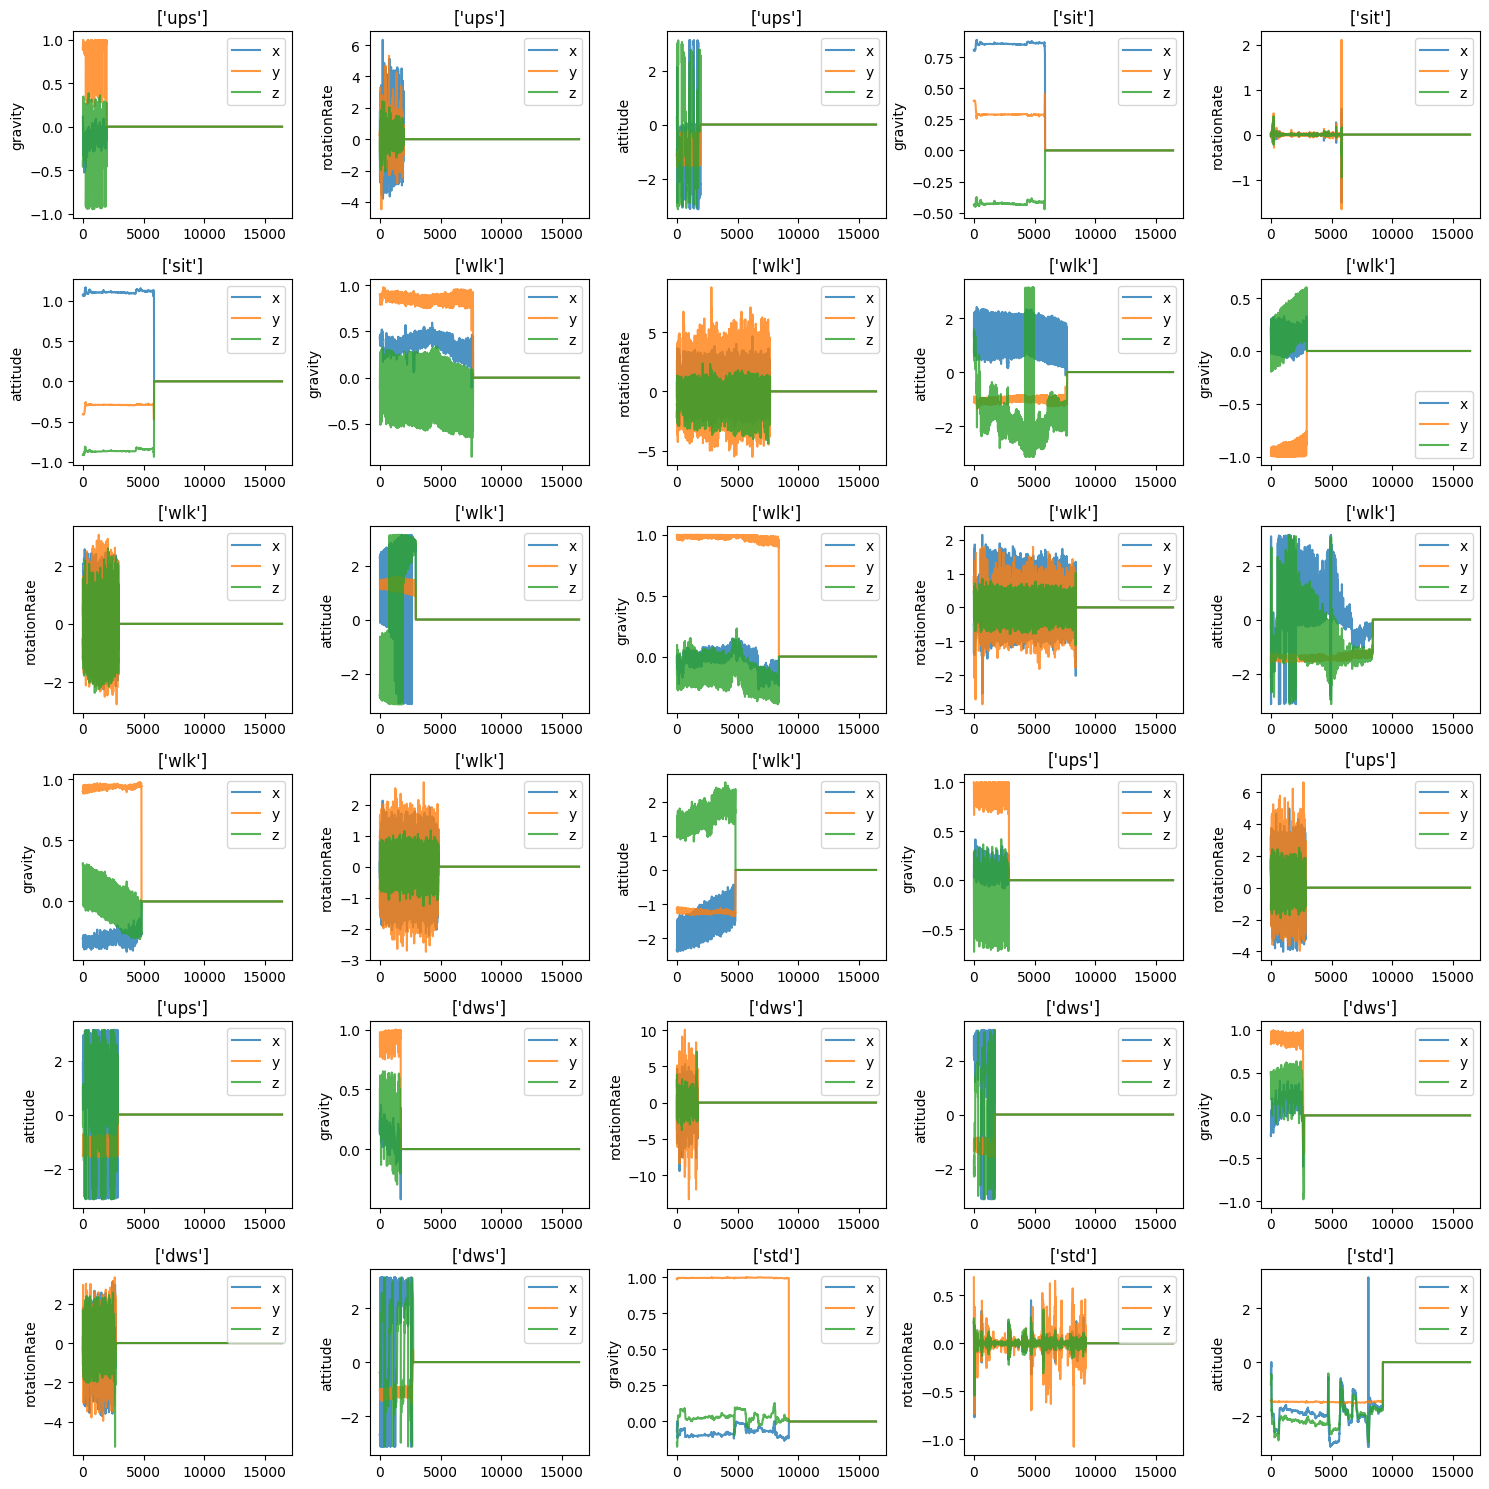

In [16]:
sample=random.sample((indexes),10)
fig=plt.figure(figsize=(15,15))
idx=1
for ind in sample:
    ax=fig.add_subplot(6, 5, idx)
    ax.plot(vis_dataset[f"gravity.x+{ind}"],label="x",alpha=0.8)
    ax.plot(vis_dataset[f"gravity.y+{ind}"],label="y",alpha=0.8)
    ax.plot(vis_dataset[f"gravity.z+{ind}"],label="z",alpha=0.8)
    ax.set(ylabel="gravity")
    ax.set_title(LE.inverse_transform([int(ind.split("_")[1])]))
    ax.legend()
    
    idx+=1
    ax=fig.add_subplot(6, 5, idx)
    ax.plot(vis_dataset[f"rotationRate.x+{ind}"],label="x",alpha=0.8)
    ax.plot(vis_dataset[f"rotationRate.y+{ind}"],label="y",alpha=0.8)
    ax.plot(vis_dataset[f"rotationRate.z+{ind}"],label="z",alpha=0.8)
    ax.set(ylabel="rotationRate")
    ax.legend()
    ax.set_title(LE.inverse_transform([int(ind.split("_")[1])]))
    idx+=1
    ax=fig.add_subplot(6,5, idx)
    ax.plot(vis_dataset[f"attitude.roll+{ind}"],label="x",alpha=0.8)
    ax.plot(vis_dataset[f"attitude.pitch+{ind}"],label="y",alpha=0.8)
    ax.plot(vis_dataset[f"attitude.yaw+{ind}"],label="z",alpha=0.8)
    ax.set(ylabel="attitude")
    ax.legend()
    ax.set_title(LE.inverse_transform([int(ind.split("_")[1])]))
    idx+=1
plt.tight_layout()

    You can see the above graph there is a patter in gravity and rotationRate for each activity.


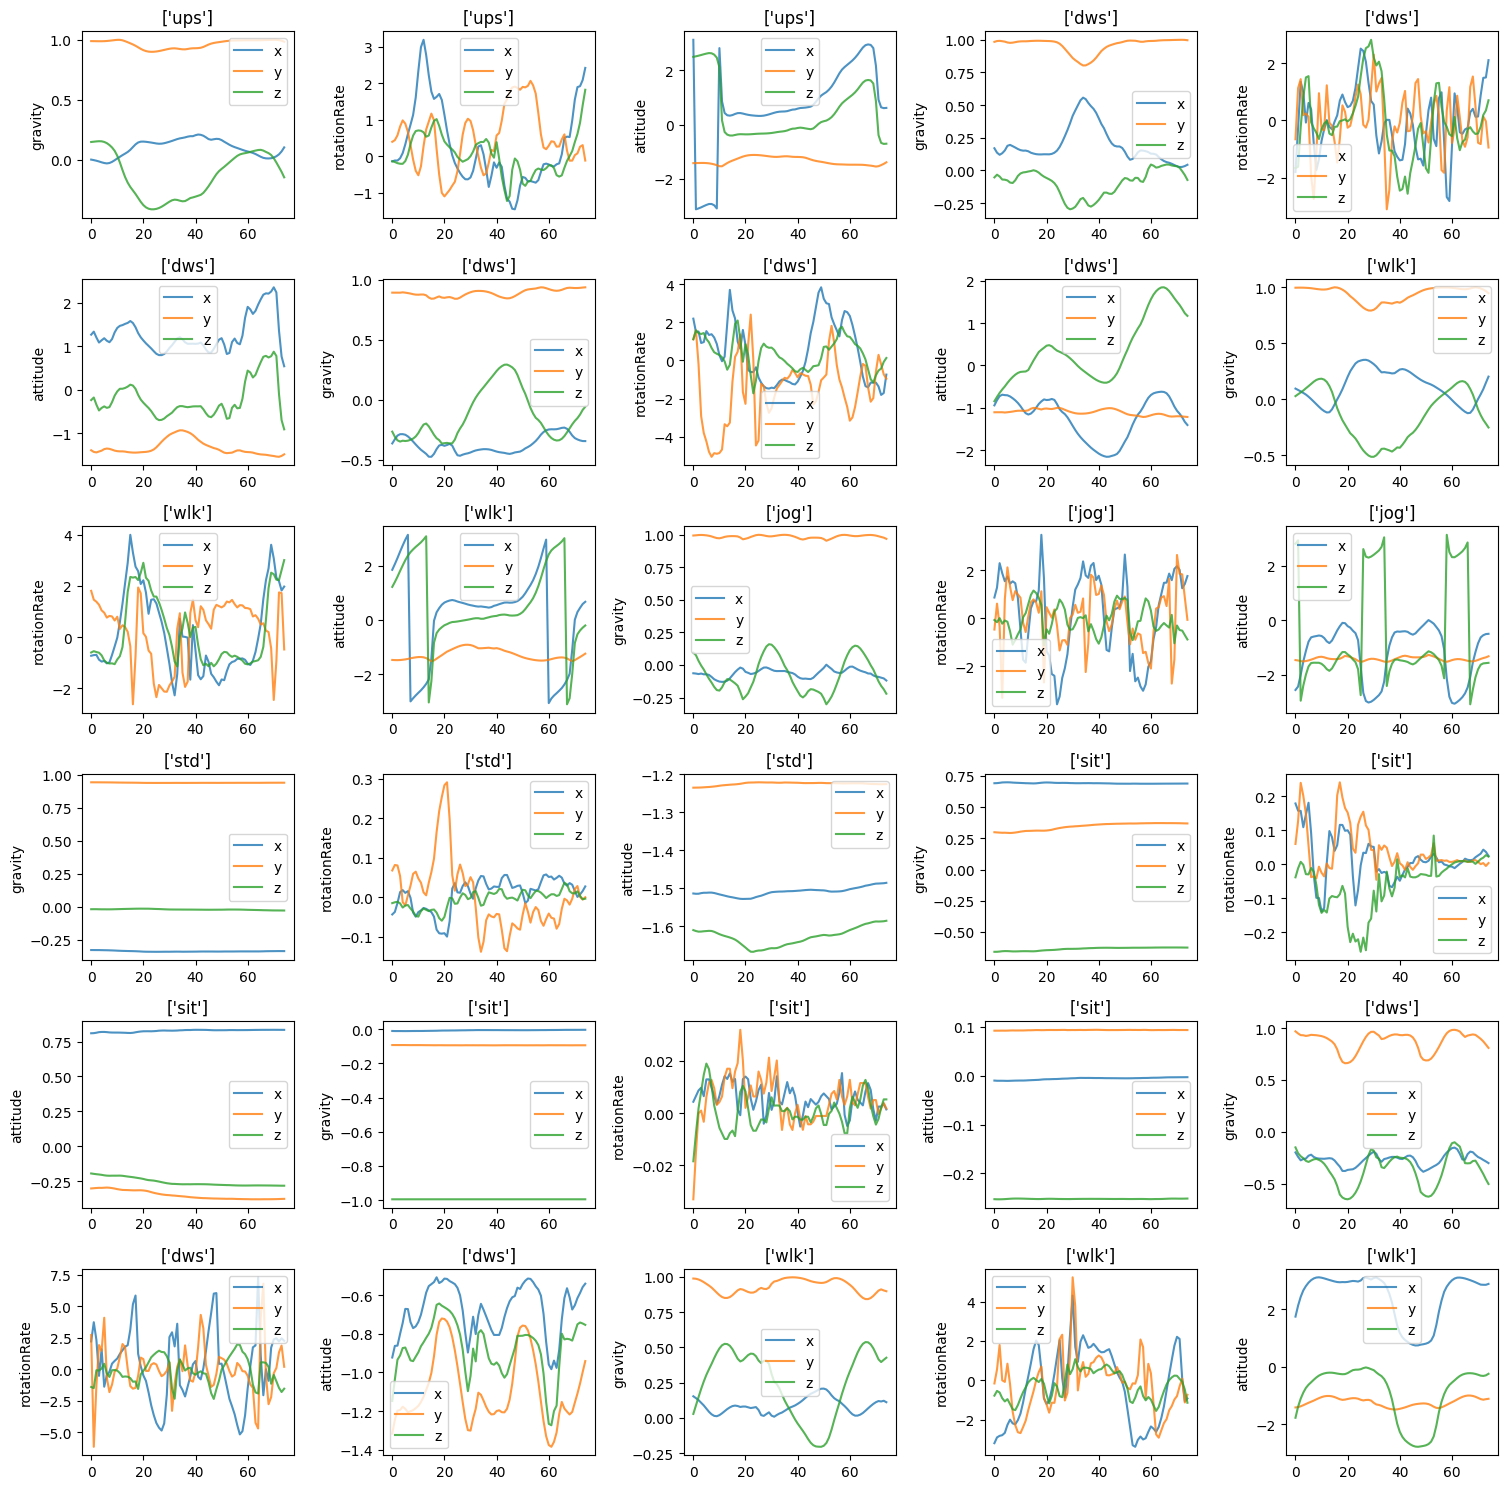

In [17]:
sample=random.sample((indexes),10)
fig=plt.figure(figsize=(15,15))
idx=1
for ind in sample:
    ax=fig.add_subplot(6, 5, idx)
    ax.plot(vis_dataset[f"gravity.x+{ind}"][:75],label="x",alpha=0.8)
    ax.plot(vis_dataset[f"gravity.y+{ind}"][:75],label="y",alpha=0.8)
    ax.plot(vis_dataset[f"gravity.z+{ind}"][:75],label="z",alpha=0.8)
    ax.set(ylabel="gravity")
    ax.set_title(LE.inverse_transform([int(ind.split("_")[1])]))
    ax.legend()
    
    idx+=1
    ax=fig.add_subplot(6, 5, idx)
    ax.plot(vis_dataset[f"rotationRate.x+{ind}"][:75],label="x",alpha=0.8)
    ax.plot(vis_dataset[f"rotationRate.y+{ind}"][:75],label="y",alpha=0.8)
    ax.plot(vis_dataset[f"rotationRate.z+{ind}"][:75],label="z",alpha=0.8)
    ax.set(ylabel="rotationRate")
    ax.legend()
    ax.set_title(LE.inverse_transform([int(ind.split("_")[1])]))
    idx+=1
    ax=fig.add_subplot(6,5, idx)
    ax.plot(vis_dataset[f"attitude.roll+{ind}"][:75],label="x",alpha=0.8)
    ax.plot(vis_dataset[f"attitude.pitch+{ind}"][:75],label="y",alpha=0.8)
    ax.plot(vis_dataset[f"attitude.yaw+{ind}"][:75],label="z",alpha=0.8)
    ax.set(ylabel="attitude")
    ax.legend()
    ax.set_title(LE.inverse_transform([int(ind.split("_")[1])]))
    idx+=1
plt.tight_layout()

In [18]:
vis_dataset["gravity.x+0_0_1"][:150]

0      0.741895
1      0.753099
2      0.759611
3      0.760709
4      0.760062
         ...   
145    0.554536
146    0.547582
147    0.538115
148    0.528358
149    0.520933
Name: gravity.x+0_0_1, Length: 150, dtype: float64

# serializing the object using pickle

In [19]:
import pickle
pickle.dump(LE,open("models/LE.pkl", "wb"))

# Model Building for prediction

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [21]:
gpus=tf.config.list_physical_devices("GPU")
if len(gpus)>0:
    tf.config.experimental.set_memory_growth(gpus[0],True)
    print(gpus[0])

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [26]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1:].values.ravel()

In [28]:
X.shape

(1412865, 12)

In [27]:
y

array([0, 0, 0, ..., 5, 5, 5])

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
model=keras.models.Sequential()

model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(48, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(6, activation="Softmax"))

model.compile(optimizer="Adam",loss="SparseCategoricalCrossentropy",metrics=["accuracy"])

In [32]:
history=model.fit(X_train,y_train,epochs=50,batch_size=100,validation_data=(X_test,y_test),callbacks=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5))

Epoch 1/50
11303/11303 [==============================] - 57s 5ms/step - loss: 0.2713 - accuracy: 0.9031 - val_loss: 0.2625 - val_accuracy: 0.9067
Epoch 2/50
11303/11303 [==============================] - 54s 5ms/step - loss: 0.2509 - accuracy: 0.9106 - val_loss: 0.2541 - val_accuracy: 0.9100
Epoch 3/50
11303/11303 [==============================] - 53s 5ms/step - loss: 0.2360 - accuracy: 0.9163 - val_loss: 0.2437 - val_accuracy: 0.9136
Epoch 4/50
11303/11303 [==============================] - 55s 5ms/step - loss: 0.2248 - accuracy: 0.9202 - val_loss: 0.2382 - val_accuracy: 0.9158
Epoch 5/50
11303/11303 [==============================] - 53s 5ms/step - loss: 0.2156 - accuracy: 0.9237 - val_loss: 0.2287 - val_accuracy: 0.9193
Epoch 6/50
11303/11303 [==============================] - 55s 5ms/step - loss: 0.2077 - accuracy: 0.9262 - val_loss: 0.2242 - val_accuracy: 0.9214
Epoch 7/50
11303/11303 [==============================] - 53s 5ms/step - loss: 0.2015 - accuracy: 0.9287 - val_loss: 0

In [33]:
model.save("models/final_model.h5")

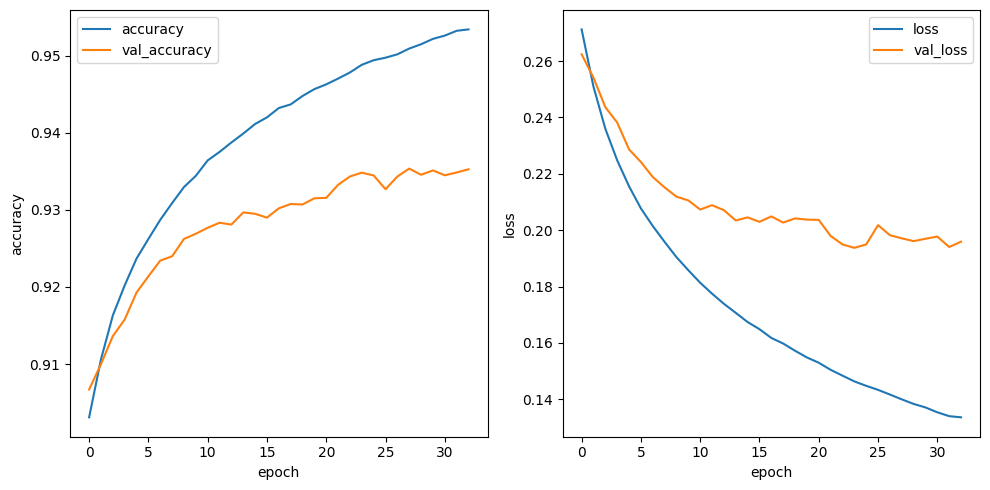

In [35]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].plot(history.history["accuracy"],label="accuracy")
ax[0].plot(history.history["val_accuracy"],label="val_accuracy")
ax[0].set(xlabel="epoch",ylabel="accuracy")
ax[0].legend(loc="best")

ax[1].plot(history.history["loss"],label="loss")
ax[1].plot(history.history["val_loss"],label="val_loss")
ax[1].set(xlabel="epoch",ylabel="loss")
ax[1].legend(loc="best")
plt.tight_layout()
plt.show()